In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.9 MB/s eta 0:00:00


In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [4]:
!unzip -q /content/drive/MyDrive/archive.zip -d /content/drive/MyDrive

replace /content/drive/MyDrive/video.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


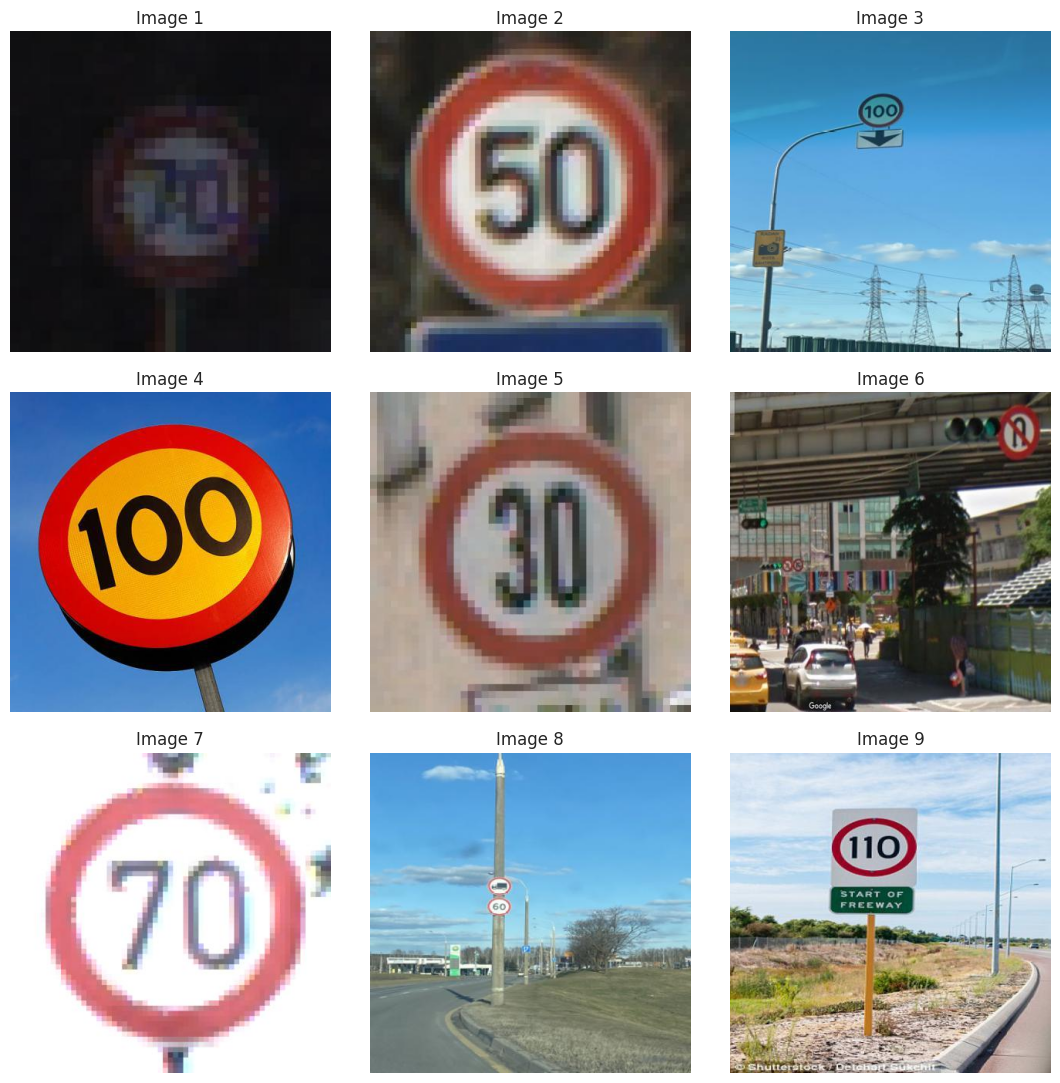

In [7]:
image_dir = "/content/drive/MyDrive/car/train/images/"

num_samples = 9
image_files = os.listdir(image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
image = cv2.imread("/content/drive/MyDrive/car/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



0: 640x640 (no detections), 8.1ms
Speed: 11.9ms preprocess, 8.1ms inference, 120.4ms postprocess per image at shape (1, 3, 640, 640)


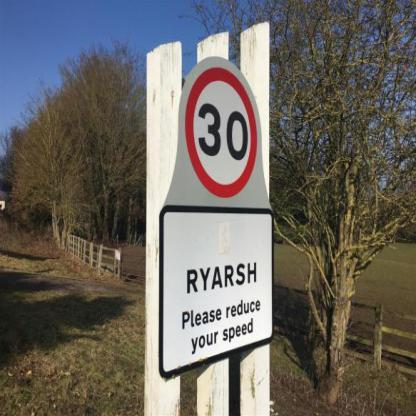

In [10]:
model = YOLO("yolov8n.pt")

image = cv2.imread("/content/drive/MyDrive/car/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
result_predicted = model.predict(source=image, imgsz=(640))

plot = result_predicted[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [11]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 MB 11.9 MB/s eta 0:00:00


In [12]:
final_model = YOLO("yolov8n.pt")

result_final_model = final_model.train(
    data="/content/drive/MyDrive/car/data.yaml",
    epochs=30,
    batch=-1,
    optimizer="auto"
)

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

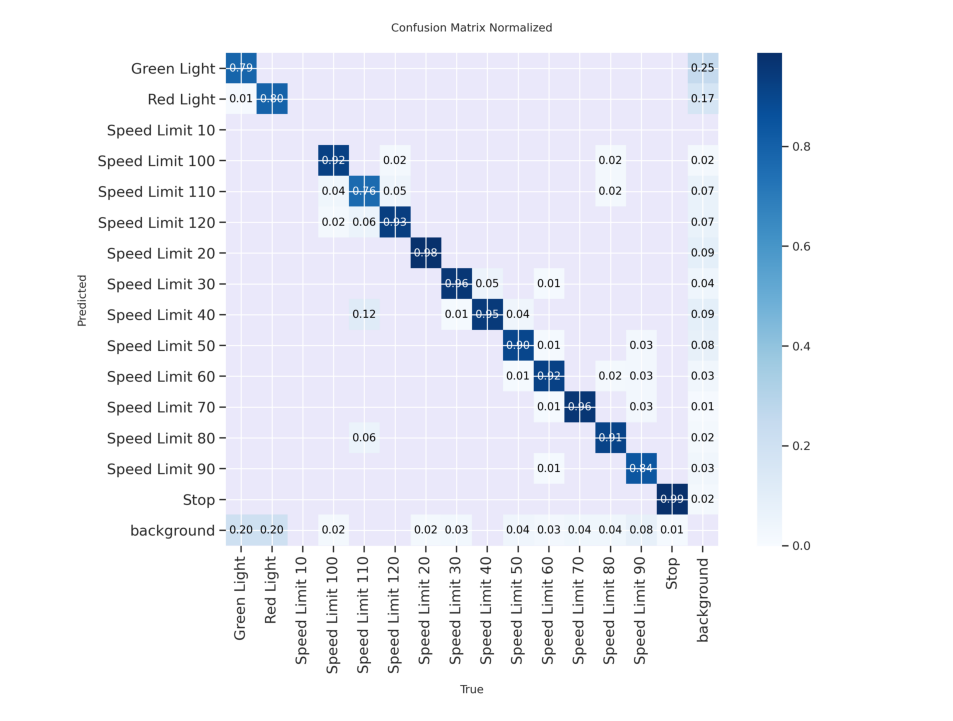

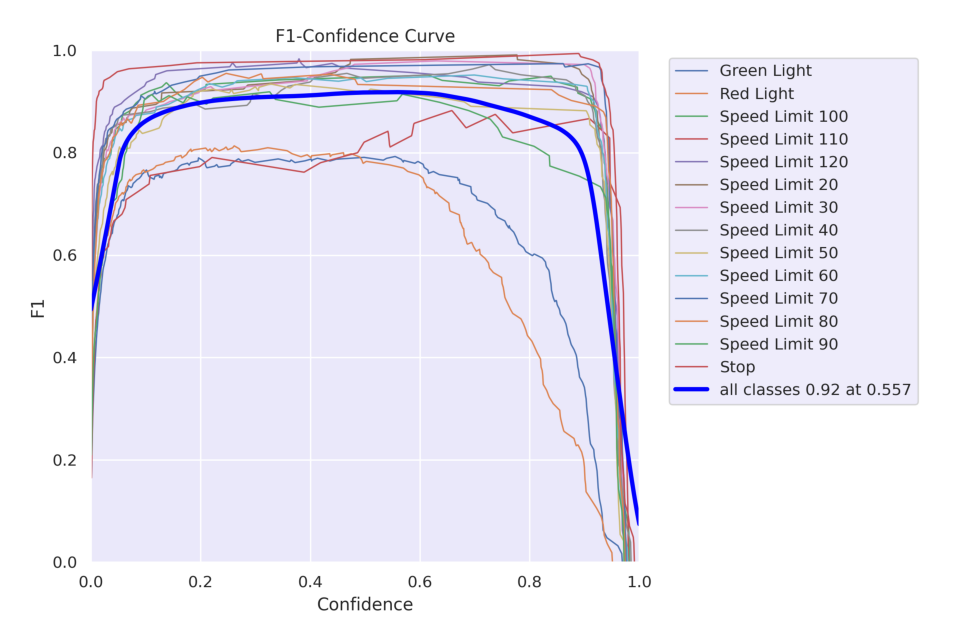

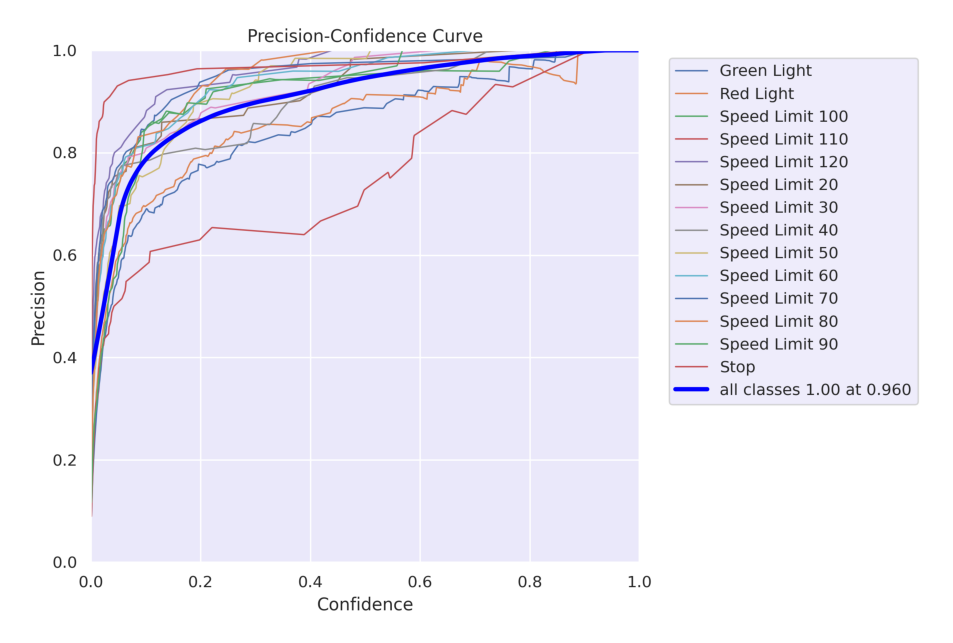

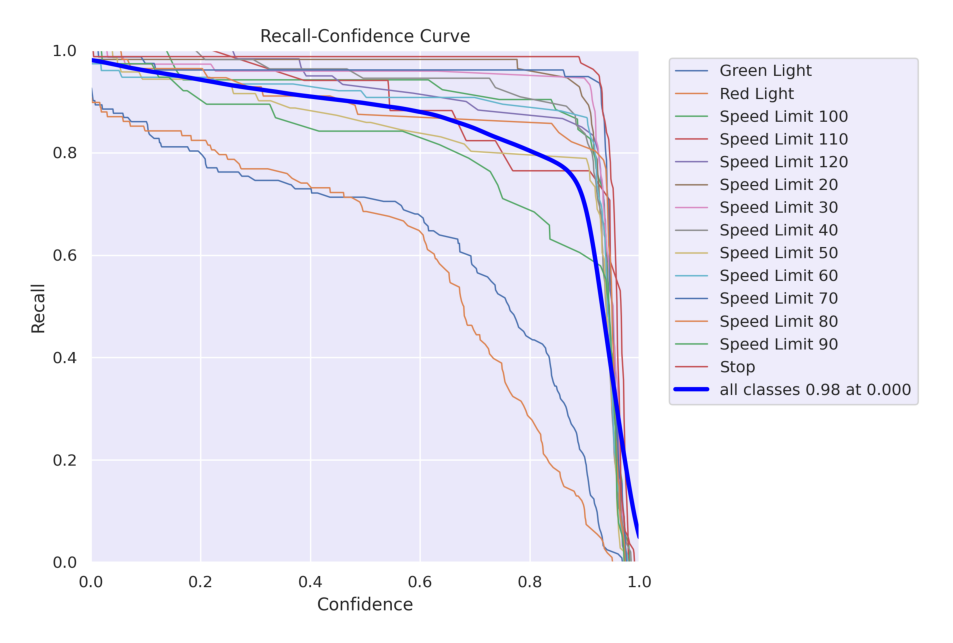

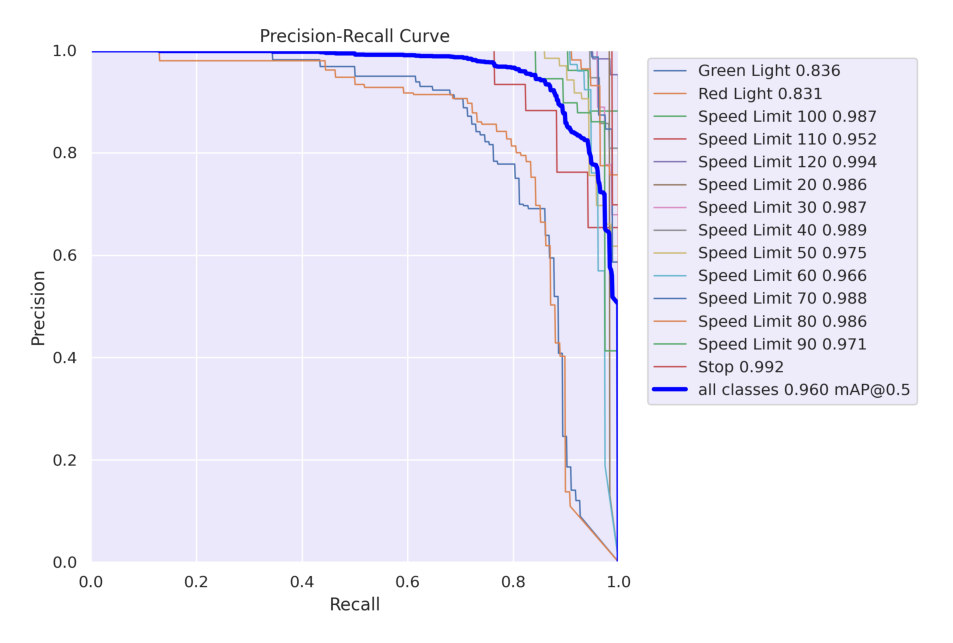

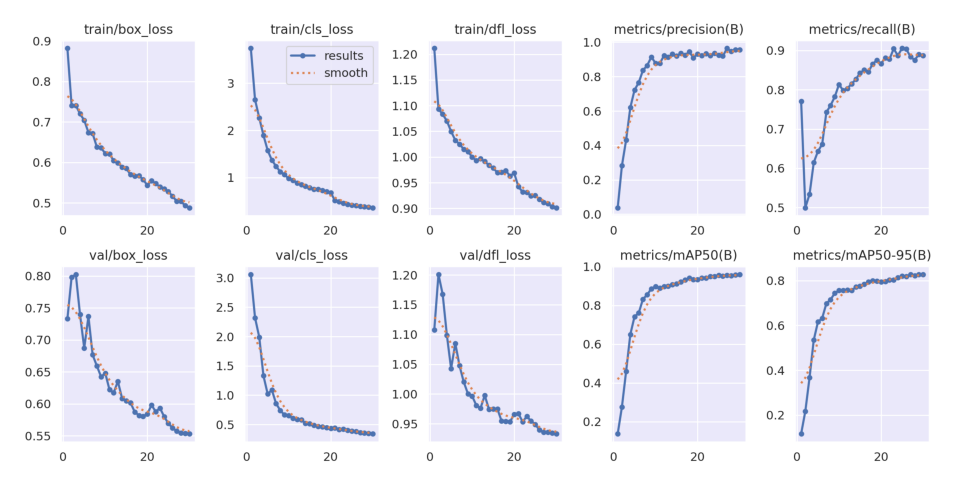

In [15]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.figure(figsize=(10, 10), dpi=120)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print(f"Warning: Could not load image at {image_path}")

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'BoxF1_curve.png',
    'BoxP_curve.png',
    'BoxR_curve.png',
    'BoxPR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [16]:
result_final_model_csv = pd.read_csv('/content/runs/detect/train/results.csv')
result_final_model_csv.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21  1562.85         0.55514         0.51236         0.94222   
21     22  1632.13         0.54780         0.49077         0.93199   
22     23  1701.35         0.53989         0.45799         0.93142   
23     24  1770.96         0.53490         0.43730         0.92417   
24     25  1840.66         0.52842         0.41991         0.92537   
25     26  1910.12         0.51676         0.40749         0.91780   
26     27  1980.08         0.50409         0.39320         0.91191   
27     28  2049.35         0.50394         0.38592         0.90912   
28     29  2117.92         0.49342         0.37543         0.90331   
29     30  2186.68         0.48843         0.36354         0.90136   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.92231            0.88139           0.94216   
21               0.93354            0.87770           0.94226   
22               0.92321            0.90439           0.95020   
23               0.93665            0.88708           0.95001   
24               0.92347            0.90559           0.95621   
25               0.91909            0.90353           0.95070   
26               0.96447            0.88397           0.95621   
27               0.94588            0.87563           0.95304   
28               0.95584            0.89030           0.95744   
29               0.95584            0.88727           0.96006   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.79666       0.59815       0.44285       0.96737  0.000179   
21              0.80392       0.58781       0.41794       0.95328  0.000161   
22              0.80315       0.59358       0.42070       0.96243  0.000144   
23              0.81295       0.58018       0.40366       0.95462  0.000127   
24              0.82043       0.56936       0.38612       0.94907  0.000109   
25              0.81905       0.56236       0.38142       0.93949  0.000092   
26              0.82733       0.55723       0.36195       0.93601  0.000075   
27              0.82189       0.55437       0.35849       0.93604  0.000057   
28              0.82685       0.55413       0.34661       0.93421  0.000040   
29              0.82794       0.55325       0.34217       0.93318  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

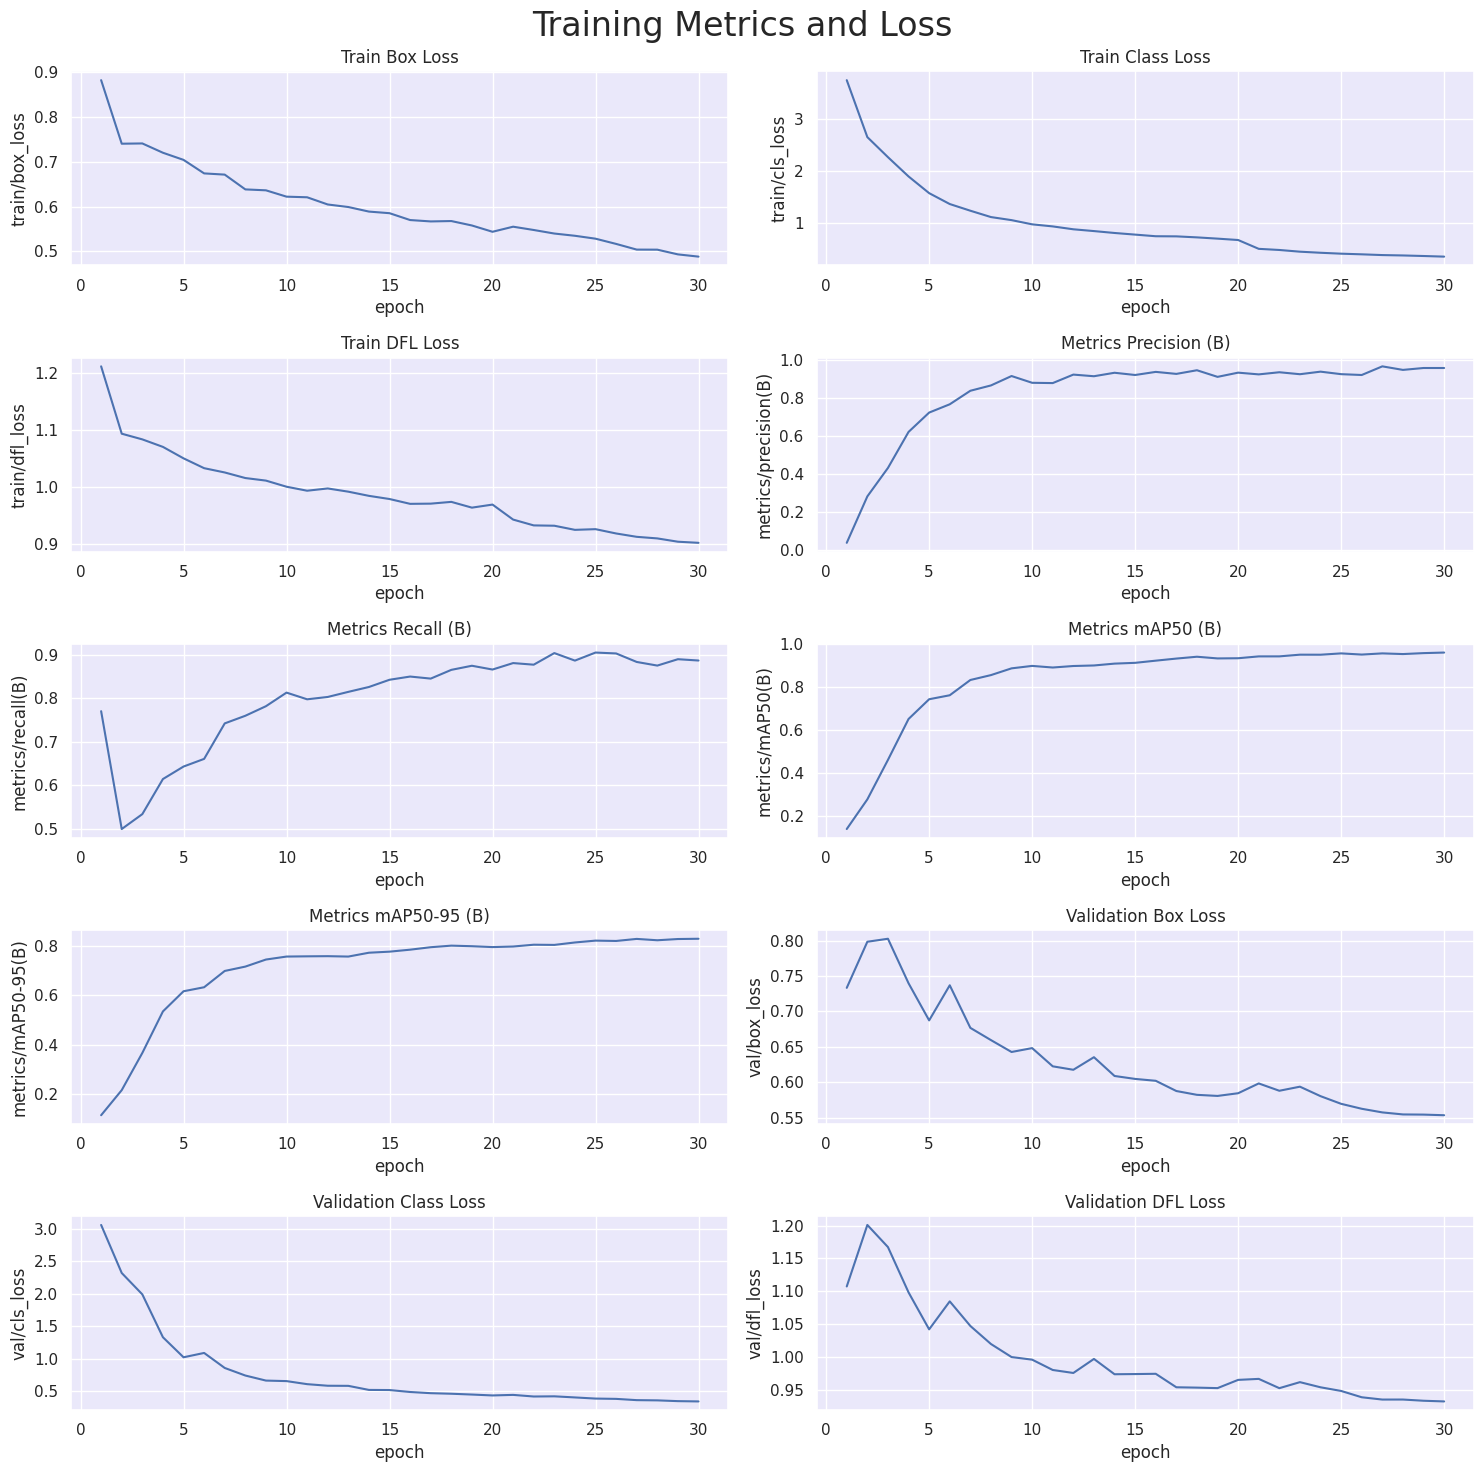

In [18]:
result_final_model_csv.columns = result_final_model_csv.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

sns.lineplot(x='epoch', y='train/box_loss', data=result_final_model_csv, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=result_final_model_csv, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=result_final_model_csv, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=result_final_model_csv, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=result_final_model_csv, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=result_final_model_csv, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=result_final_model_csv, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=result_final_model_csv, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=result_final_model_csv, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=result_final_model_csv, ax=axs[4,1])

axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [19]:
valid_model = YOLO("/content/runs/detect/train/weights/best.pt")

metrics = valid_model.val(split='val')

print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 5.4±2.3 MB/s, size: 11.2 KB)
val: Scanning /content/drive/MyDrive/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 801/801 1183804.6it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 51/51 3.8it/s 13.5s
                   all        801        944      0.956      0.887       0.96      0.828
           Green Light         87        122      0.905      0.703      0.832      0.503
             Red Light         74        108      0.912      0.671      0.832        0.5
       Speed Limit 100         52         52      0.957      0.942      0.987       0.88
       Speed Limit 110         17         17      0.763      0.882      0.952      0.865
       Speed Limit 120         60      


0: 640x640 1 Speed Limit 30, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 7.4ms
Speed: 2.8ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 7.3ms
Speed: 2.9ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 7.6ms
Speed: 2.9ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Speed Limit 70s, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Green Lights, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 13.3ms
Speed: 2.2ms preprocess, 13.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 7.4ms
Speed: 2.9ms preprocess, 7.4ms inference, 1.2ms postproce

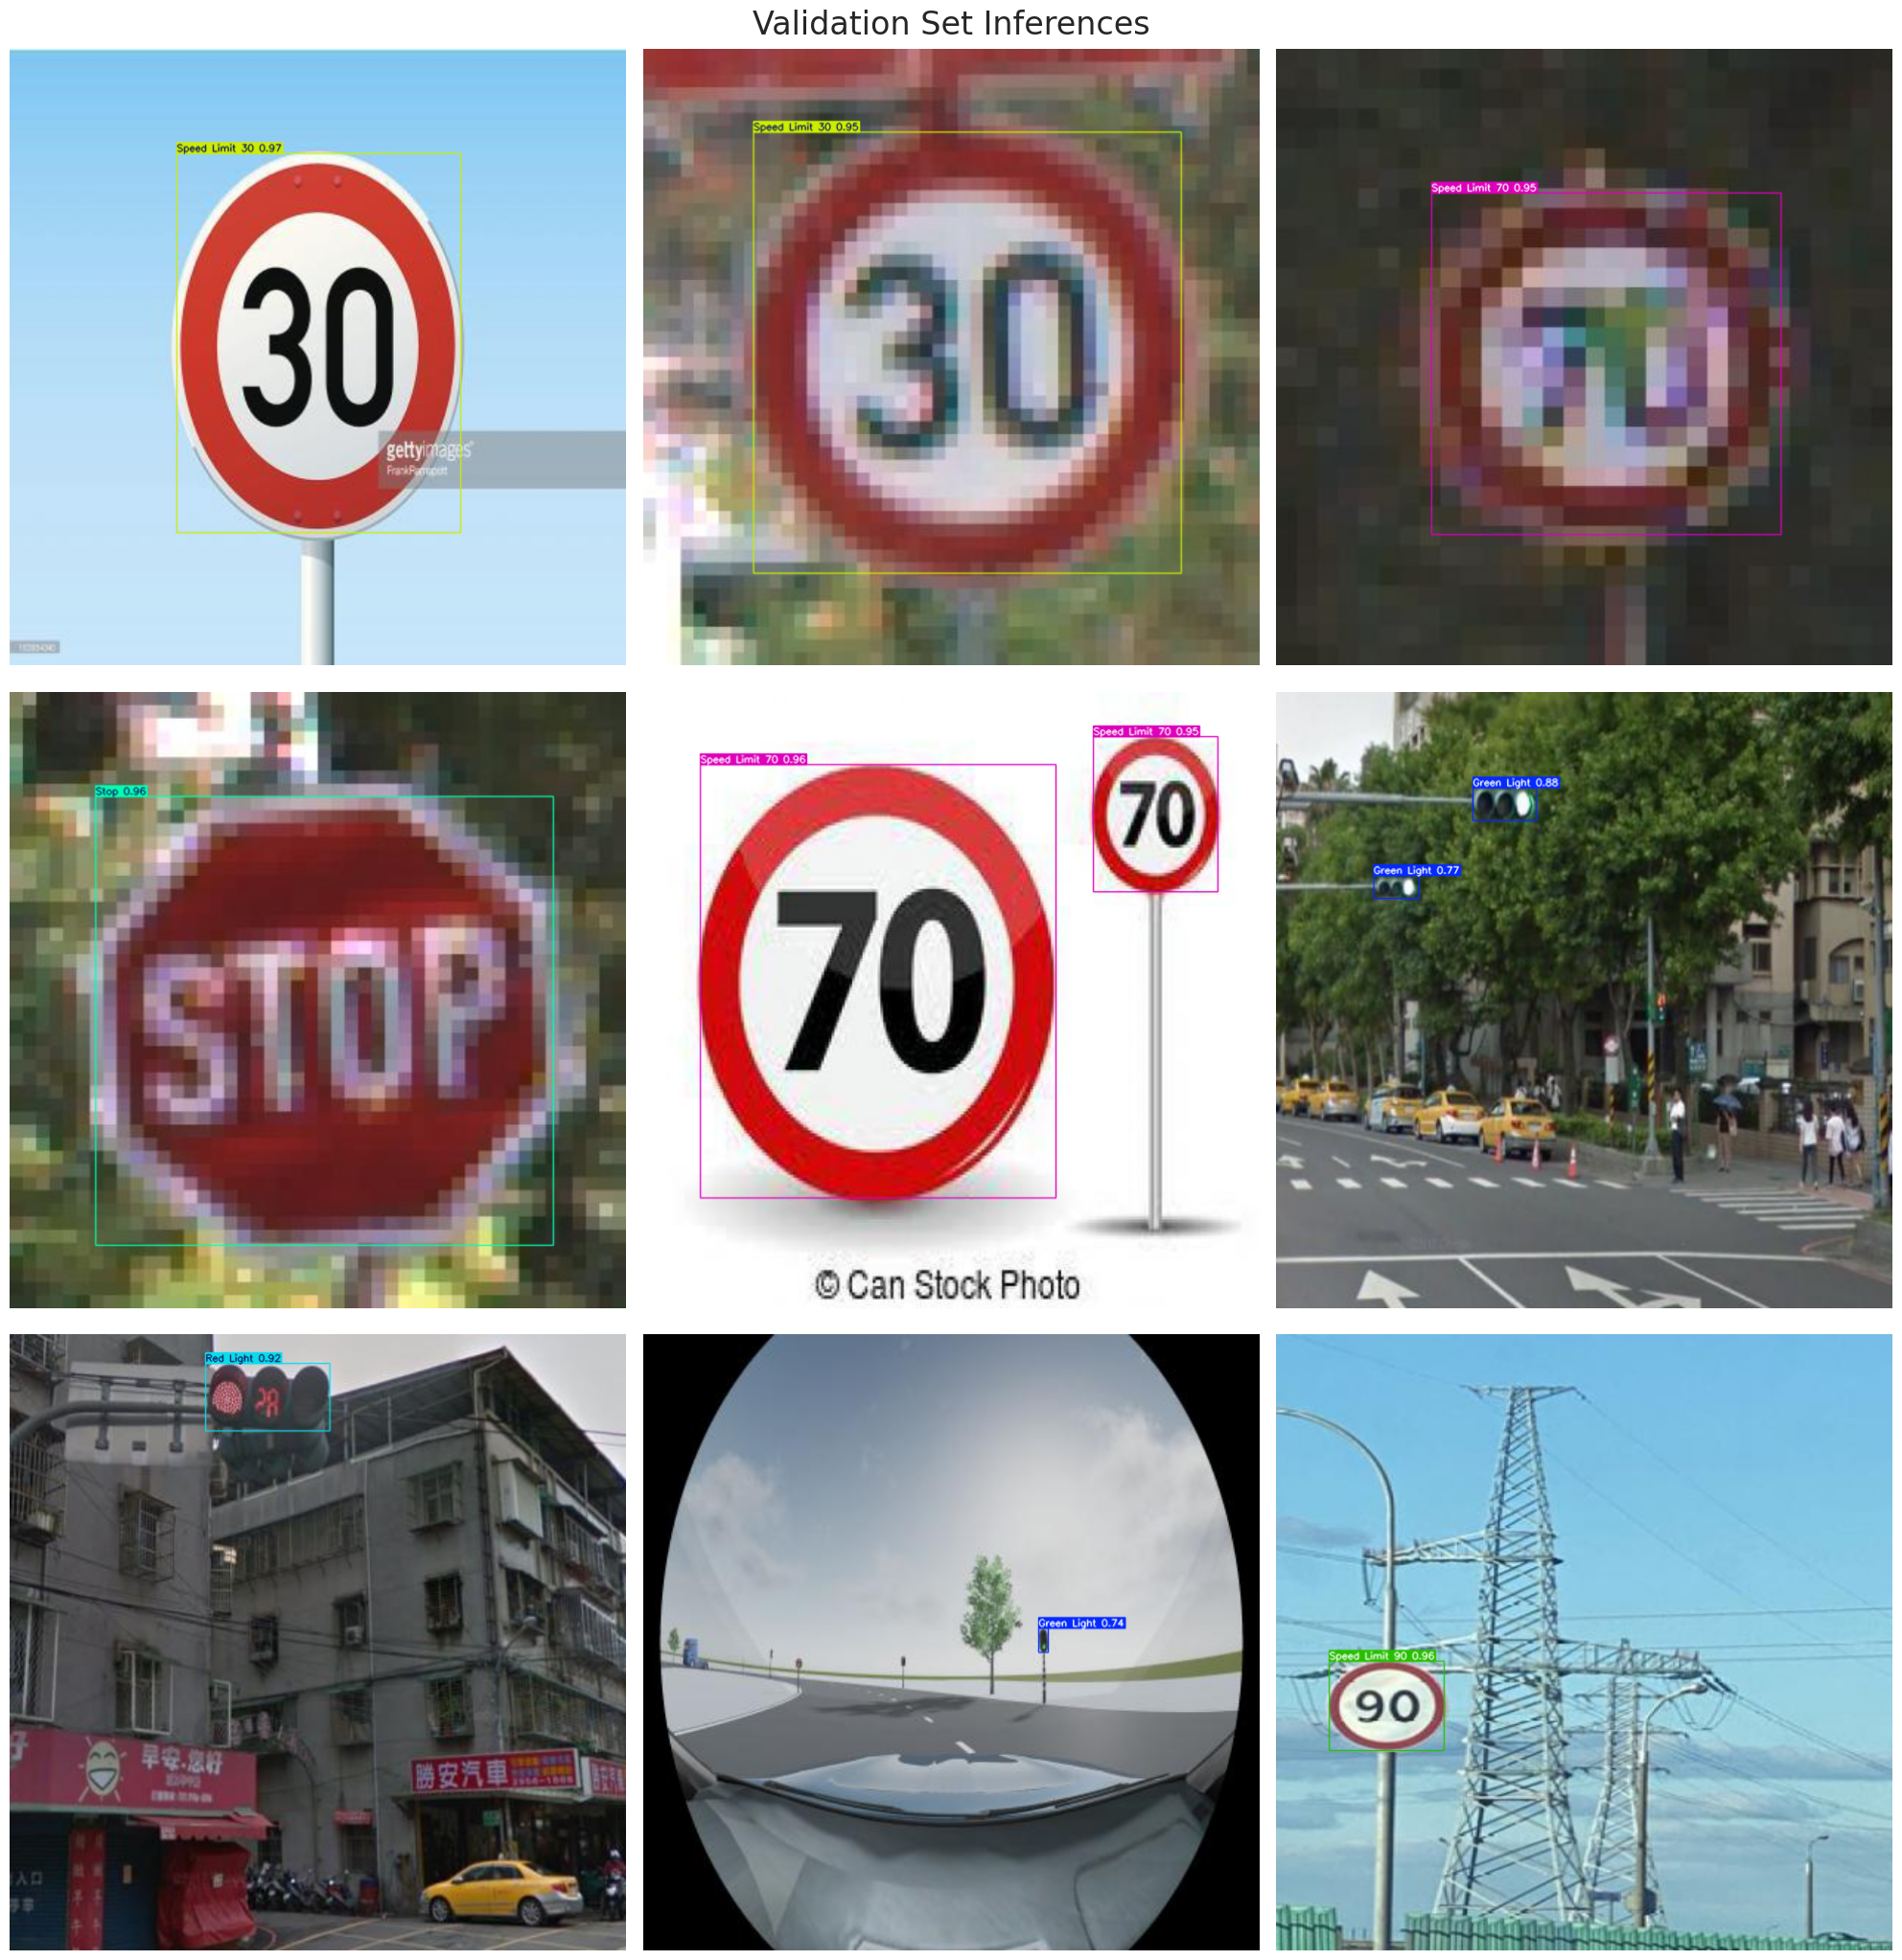

In [24]:
def normalize_image(image):
    return image / 255.0

def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

data_path = "/content/drive/MyDrive/car/"
valid_images_path = os.path.join(data_path, "test", "images")

image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

if len(image_files) > 0:
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            image = cv2.imread(image_path)

            if image is not None:
                resized_image = resize_image(image, size=(640, 640))
                normalized_image = normalize_image(resized_image)
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                results = valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [37]:
# Convert mp4
!ffmpeg -y -loglevel panic -i /content/drive/MyDrive/video.mp4 output.mp4## <b>6 <span style='color:#e61227'>|</span> Export The Final Model Of Detect Traffic Signs </b>

# **Tip:** The ultimate goal of training a model is to deploy it for real-world applications. Export mode in Ultralytics YOLOv8 offers a versatile range of options for exporting your trained model to different formats, making it deployable across various platforms and devices.

# Display the video
Video("/content/drive/MyDrive/output.mp4", width=960, embed=True)

/bin/bash: -c: line 1: syntax error near unexpected token `<'
/bin/bash: -c: line 1: `ffmpeg -y -loglevel panic -i /content/drive/MyDrive/video.mp4 output.mp4## <b>6 <span style='color:#e61227'>|</span> Export The Final Model Of Detect Traffic Signs </b>'


In [46]:
!pip install --upgrade ultralytics

In [47]:
valid_model.predict(source="/content/drive/MyDrive/video.mp4", save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



error: OpenCV(4.12.0) /io/opencv/modules/highgui/src/window.cpp:1284: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


In [48]:
valid_model.export(format="onnx")

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 19, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.65', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 7.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.0 opset 19...
ONNX: slimming with onnxslim 0.1.65...
ONNX: export success ✅ 11.6s, saved as '/content/runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (11.9s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640  


'/content/runs/detect/train/weights/best.onnx'